In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import requests
import time
from dotenv import load_dotenv
import google.generativeai as genai
import tqdm as tqdm
from IPython.display import display, Markdown, clear_output

In [6]:
load_dotenv(override=True)

True

In [3]:
key = os.getenv("GEMINI_API_KEY")

In [4]:
if not key:
    print("No API key was found !!!")
else:
    print("API key found !!!")

API key found !!!


In [5]:
import google.generativeai as genai

class GenerativeAI:
    def __init__(self, key):
        self.__key = key              
        self.__model_name = None      
        self.model = None
        self.configured = False

    # -----------------------
    # Getter for model name
    # -----------------------
    def get_model_name(self):
        return self.__model_name

    # -----------------------
    # Setter for model name
    # -----------------------
    def set_model_name(self, name):
        self.__model_name = name
        if self.configured:            
            self.model = genai.GenerativeModel(self.__model_name)

    def configuration(self):
        print("Configuring...")
        genai.configure(api_key=self.__key)
        self.configured = True

        if self.__model_name:
            self.model = genai.GenerativeModel(self.__model_name)

        print("Configuration Done !!!")
        return True

    def available_models(self):
        if not self.configured:
            print("Please configure first!!!")
            return None

        models = [model.name for model in genai.list_models()]
        return models

    
    def generate(self, query):
        if not self.configured:
            raise RuntimeError("Please call configuration() first.")
    
        if not self.__model_name:
            raise RuntimeError("No model name set. Use set_model_name().")
    
        response = self.model.generate_content(
            query,
            stream=True
        )
    
        final_output = ""
        md_output = ""
    
        disp = display(Markdown(""), display_id=True)
    
        for chunk in response:
            if chunk.text:
                for ch in chunk.text:
                    md_output += ch
                    final_output += ch
    
                    clear_output(wait=True)
                    disp = display(Markdown(md_output), display_id=True)
                    time.sleep(0.005)   
    
        clear_output(wait=True)
        display(Markdown(final_output))   
    
    def __str__(self):
        return f"GenerativeAI"


In [6]:
run = GenerativeAI(key)
print(run)

GenerativeAI


In [7]:
run.available_models()

Please configure first!!!


In [8]:
run.configuration()

Configuring...
Configuration Done !!!


True

In [9]:
run.available_models()

['models/embedding-gecko-001',
 'models/gemini-2.5-pro-preview-03-25',
 'models/gemini-2.5-flash-preview-05-20',
 'models/gemini-2.5-flash',
 'models/gemini-2.5-flash-lite-preview-06-17',
 'models/gemini-2.5-pro-preview-05-06',
 'models/gemini-2.5-pro-preview-06-05',
 'models/gemini-2.5-pro',
 'models/gemini-2.0-flash-exp',
 'models/gemini-2.0-flash',
 'models/gemini-2.0-flash-001',
 'models/gemini-2.0-flash-exp-image-generation',
 'models/gemini-2.0-flash-lite-001',
 'models/gemini-2.0-flash-lite',
 'models/gemini-2.0-flash-lite-preview-02-05',
 'models/gemini-2.0-flash-lite-preview',
 'models/gemini-2.0-pro-exp',
 'models/gemini-2.0-pro-exp-02-05',
 'models/gemini-exp-1206',
 'models/gemini-2.0-flash-thinking-exp-01-21',
 'models/gemini-2.0-flash-thinking-exp',
 'models/gemini-2.0-flash-thinking-exp-1219',
 'models/gemini-2.5-flash-preview-tts',
 'models/gemini-2.5-pro-preview-tts',
 'models/learnlm-2.0-flash-experimental',
 'models/gemma-3-1b-it',
 'models/gemma-3-4b-it',
 'models/g

In [10]:
run.set_model_name("gemini-2.5-flash")

In [11]:
run.get_model_name()

'gemini-2.5-flash'

In [12]:
ai = run
ai.generate("What is Agentic AI?")

**Agentic AI** refers to artificial intelligence systems that are designed to **act autonomously in an environment to achieve a specific goal or objective**, rather than simply responding to a single prompt or command.

Think of it less like a calculator that gives you an answer to a single question, and more like a proactive assistant that can break down a complex task, plan steps, execute actions, monitor its progress, adapt if needed, and report back when the task is complete.

**Key Characteristics of Agentic AI:**

1.  **Goal-Oriented:** They are given an objective (e.g., "Plan and book a trip to Paris for next month," "Research the latest trends in renewable energy," "Debug this code and suggest improvements").
2.  **Autonomy:** They can initiate actions and make decisions without constant human intervention for every single step.
3.  **Perception:** They can "observe" or gather information from their environment (e.g., browsing the web, reading documents, interacting with APIs, receiving user input).
4.  **Planning & Reasoning:** They can break down a high-level goal into smaller, manageable sub-tasks, devise a sequence of actions, and reason about the best way to achieve their objective.
5.  **Action/Execution:** They can perform actions in their environment. This often involves using "tools" like:
    *   Web browsers (for search, data retrieval)
    *   APIs (to interact with other software, databases, services like email, calendars, booking sites)
    *   Code interpreters (to write, test, and execute code)
    *   File systems (to read and write documents)
6.  **Memory & State Management:** They can remember previous interactions, the current state of their task, and their progress towards the goal, allowing for continuous, multi-step operations.
7.  **Monitoring & Adaptation:** They can check if their actions are successful, identify errors or roadblocks, and adjust their plan or approach accordingly.
8.  **Self-Correction/Reflection:** Some advanced agents can even evaluate their own thought process or actions and learn from their mistakes to improve future performance.

**How it Differs from a Standard LLM (like ChatGPT):**

A standard LLM like ChatGPT is primarily a **reactive text generator**. You give it a prompt, it generates a response, and the interaction typically ends there. Each prompt is often a fresh start, without memory of a complex, ongoing goal.

An Agentic AI, while often *powered* by an LLM as its "brain" for reasoning and natural language understanding, integrates that LLM into a larger system that allows it to:

*   **Iterate:** Take multiple steps over time.
*   **Utilize External Tools:** Go beyond just generating text.
*   **Maintain Context:** Work towards a long-term objective.
*   **Take Initiative:** Decide what to do next based on its goal and observations.

**Examples of Agentic AI Use Cases:**

*   **Personal Assistant:** Planning and booking a complex trip (flights, hotels, itinerary, restaurant reservations) by interacting with multiple websites and APIs.
*   **Software Development:** Debugging code, writing new functions, running tests, and even deploying minor updates autonomously.
*   **Research Assistant:** Searching databases, synthesizing information from multiple sources, generating reports, and even drafting presentations.
*   **Business Automation:** Monitoring market trends, generating financial reports, managing customer support tickets, or automating parts of a sales pipeline.
*   **Robotics:** A robot using an agentic AI to navigate an environment, identify objects, and complete a physical task.

**Challenges and Considerations:**

While powerful, Agentic AIs also raise significant challenges:

*   **Safety and Control:** Ensuring they don't take unintended or harmful actions, especially if they have access to real-world tools.
*   **Reliability:** They can still "hallucinate" or make errors in reasoning, leading to incorrect or inefficient actions.
*   **Transparency:** Understanding *why* an agent took a particular sequence of steps can be difficult.
*   **Resource Intensive:** Running multiple steps, tool calls, and LLM inferences can be computationally expensive.
*   **Ethical Concerns:** Issues around accountability, bias, and the potential for misuse.

Agentic AI represents a significant step towards more sophisticated and capable AI systems, moving beyond simple question-answering to genuinely autonomous problem-solving.

# Now Lets do the Same thing using Open source models !!! (Ollama) 😁
- Download ollma desktop from https://ollama.com/download
- After installation check this port http://localhost:11434

 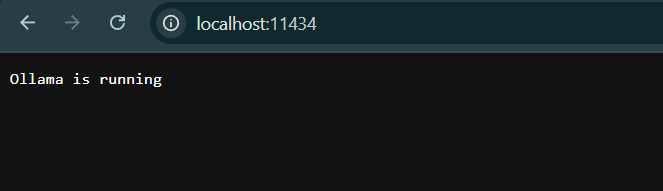


- Models Search and pull
- https://ollama.com/search 

In [13]:
import ollama
from IPython.display import Markdown as md

In [14]:
API = "http://localhost:11434/api/chat"
HEADERS = {
    "Content-Type": "application/json"
    }
MODEL = "llama3.2:3b"

In [15]:
messages = [
    {
     "role": "user", 
     "content": "Describe some of the business applications of Agentic AI"
    }
]

In [16]:
payload = {
        "model": MODEL,
        "messages": messages,
        "stream" : False
    }

In [17]:
response = requests.post(API, json=payload, headers=HEADERS)
md(response.json()['message']['content'])

Agentic AI, also known as autonomous or self-aware AI, has numerous business applications across various industries. Here are some examples:

1. **Business Process Automation**: Agentic AI can optimize and automate business processes by learning from data and adapting to changing conditions, reducing manual errors and increasing efficiency.
2. **Supply Chain Management**: Autonomous agents can optimize supply chain operations by predicting demand, managing inventory, and making decisions in real-time, leading to reduced costs and improved customer satisfaction.
3. **Customer Service and Support**: Agentic AI-powered chatbots and virtual assistants can provide personalized support, answer customer queries, and route complex issues to human representatives, improving customer experience and reducing support costs.
4. **Predictive Maintenance**: Autonomous agents can analyze sensor data from equipment and machinery, predict maintenance needs, and schedule repairs or replacements before failures occur, reducing downtime and increasing overall system reliability.
5. **Marketing and Advertising**: Agentic AI can optimize marketing campaigns by analyzing customer behavior, predicting responses to different ads, and adjusting ad targeting in real-time, leading to improved ROI and better customer engagement.
6. **Financial Analysis and Risk Management**: Autonomous agents can analyze financial data, identify trends, and make predictions about market movements, helping investors make informed decisions and reducing the risk of losses.
7. **Cybersecurity**: Agentic AI-powered systems can detect and respond to cyber threats in real-time, identifying vulnerabilities, predicting attacks, and taking corrective action before harm is done.
8. **Logistics and Transportation**: Autonomous agents can optimize routes, manage inventory, and predict demand for transportation services, leading to reduced costs, improved efficiency, and better customer satisfaction.
9. **Healthcare**: Agentic AI can analyze medical data, identify patterns, and make predictions about patient outcomes, helping healthcare professionals diagnose and treat patients more effectively.
10. **Manufacturing**: Autonomous agents can optimize production processes by analyzing data from sensors, machines, and equipment, making decisions in real-time, and adjusting production lines to meet changing demand.

These are just a few examples of the business applications of Agentic AI. As this technology continues to evolve, we can expect to see even more innovative use cases across various industries.

**Challenges and Considerations**

While Agentic AI has numerous benefits, there are also challenges and considerations that businesses must address:

* **Regulatory compliance**: Businesses must ensure that their Agentic AI systems comply with relevant laws and regulations.
* **Data quality and availability**: High-quality data is necessary for effective Agentic AI decision-making. Ensuring data accuracy, completeness, and relevance can be a challenge.
* **Explainability and transparency**: As Agentic AI makes decisions autonomously, it's essential to understand how those decisions were made and ensure transparency in decision-making processes.
* **Bias and fairness**: Businesses must design Agentic AI systems that avoid biases and ensure fairness in decision-making.

By addressing these challenges and leveraging the benefits of Agentic AI, businesses can unlock new opportunities for growth, innovation, and competitiveness.

In [18]:
response = ollama.chat(model=MODEL, messages=messages)
md(response['message']['content'])

Agentic AI, also known as autonomous or self-aware AI, refers to a type of artificial intelligence that can perceive its environment, make decisions, and adapt to changing circumstances. Some potential business applications of agentic AI include:

1. **Autonomous Maintenance**: Agentic AI can be used to monitor equipment in real-time, detect anomalies, and perform maintenance tasks autonomously, reducing downtime and increasing overall efficiency.
2. **Predictive Analytics**: By analyzing vast amounts of data, agentic AI can predict potential problems or opportunities, enabling businesses to take proactive measures to prevent losses or capitalize on new market trends.
3. **Personalized Customer Service**: Agentic AI-powered chatbots and virtual assistants can learn customer preferences and adapt their responses accordingly, providing a more personalized experience for customers.
4. **Supply Chain Optimization**: Agentic AI can analyze supply chain data in real-time, detecting potential bottlenecks and disruptions, and suggesting optimal routes or logistics to minimize delays.
5. **Cybersecurity**: Agentic AI-powered threat detection systems can identify and respond to cyber threats in real-time, reducing the risk of data breaches and system downtime.
6. **Autonomous Trading**: Agentic AI can analyze market trends, predict stock prices, and execute trades autonomously, potentially leading to more efficient trading strategies.
7. **Smart Infrastructure Management**: Agentic AI can monitor and optimize infrastructure performance in real-time, detecting potential issues before they become major problems.
8. **Autonomous Vehicle Operations**: Agentic AI can be used to develop autonomous vehicles that can navigate complex environments, make decisions, and adapt to changing circumstances.
9. **Healthcare Personalized Medicine**: Agentic AI can analyze patient data, identify patterns, and recommend personalized treatment plans, potentially leading to more effective disease management.
10. **Robotics Process Automation (RPA)**: Agentic AI can be used to automate repetitive tasks in various industries, such as bookkeeping, accounting, or HR processes.

These are just a few examples of the many potential business applications of agentic AI. As the technology continues to evolve, we can expect to see even more innovative and efficient solutions emerge across various industries.

# Lets Start Streaming the Responses

In [19]:
import json
def stream_ollama(messages):
    payload = {
        "model": MODEL,
        "messages": messages,
        "stream": True
    }
    
    response = requests.post(API, json=payload, headers=HEADERS, stream=True)

    for line in response.iter_lines(decode_unicode=True):
        if not line:
            continue
        data = json.loads(line)
        chunk = data.get("message", {}).get("content", "")
        if chunk:
            yield chunk

buffer = ""

for chunk in stream_ollama(messages):
    buffer += chunk
    clear_output(wait=True)        
    display(Markdown(buffer))      

Agentic AI refers to artificial intelligence that can make decisions and act on its own, without explicit human instruction. This type of AI has various business applications across industries. Here are some examples:

1. **Predictive Maintenance**: Agentic AI-powered systems can monitor equipment and predict when maintenance is required, reducing downtime and increasing overall efficiency.
2. **Autonomous Trading**: AI algorithms can analyze market trends and make trades based on their own assessment, allowing businesses to optimize their investment strategies.
3. **Supply Chain Optimization**: Agentic AI can analyze real-time data from various sources, such as sensors and logistics providers, to identify bottlenecks and suggest improvements in supply chain management.
4. **Customer Service Chatbots**: Agentic AI-powered chatbots can respond to customer inquiries and escalate complex issues to human representatives, providing 24/7 support without the need for constant human intervention.
5. **Autonomous Vehicles**: Agentic AI is being explored for use in self-driving cars, trucks, and drones, which could revolutionize transportation and logistics industries.
6. **Cybersecurity**: Agentic AI-powered systems can detect and respond to cyber threats in real-time, reducing the risk of data breaches and other security incidents.
7. **Content Generation**: Agentic AI can generate high-quality content, such as articles, social media posts, and product descriptions, at scale and with minimal human oversight.
8. **Financial Risk Management**: Agentic AI can analyze large datasets to identify potential risks and suggest strategies for mitigating them, helping businesses make more informed investment decisions.
9. **Manufacturing Line Optimization**: Agentic AI can optimize production workflows, predict equipment failures, and recommend maintenance schedules, leading to increased efficiency and reduced costs.
10. **Healthcare**: Agentic AI can analyze medical data, identify patterns, and suggest personalized treatment plans, potentially improving patient outcomes and reducing healthcare costs.

These business applications are just a few examples of the many ways in which agentic AI is being used to drive innovation and growth across various industries.

# OpenAI Cleint service for Ollama and google gemini

In [21]:
from openai import OpenAI

In [22]:
ollama_via_openai = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')

response = ollama_via_openai.chat.completions.create(
    model=MODEL,
    messages=messages
)

md(response.choices[0].message.content)

Agentic AI refers to autonomous artificial intelligence systems that can act upon their own objectives and make decisions based on their own goals, values, and preferences. Some potential business applications of Agentic AI include:

1. **Predictive maintenance**: Agentic AI-powered predictive maintenance systems can identify equipment failure patterns and take proactive measures to prevent downtime and reduce maintenance costs.
2. **Supply chain optimization**: Agentic AI can optimize supply chains by autonomously adjusting procurement, inventory management, and shipping routes based on real-time market data and external factors.
3. **Marketing automation**: Agentic AI-powered marketing systems can automate advertising campaigns, personalize customer interactions, and adjust tactics based on performance metrics and target audience feedback.
4. **Customer service chatbots**: Agentic AI-powered chatbots can respond to customer inquiries, empathize with customers, and resolve issues in a more human-like manner while also adapting to changing context and preferences.
5. **Cybersecurity threat response**: Agentic AI can rapidly detect and respond to emerging cybersecurity threats by autonomously identifying vulnerabilities, patching software weaknesses, and implementing new security protocols.
6. **Financial analysis**: Agentic AI-powered financial systems can analyze market trends, predict stock prices, and suggest alternative investment strategies based on shifting economic conditions.
7. **Autonomous vehicles**: Agentic AI is being used in self-driving cars to optimize routes, avoid obstacles, and make decisions in real-time, potentially reducing accidents and improving transportation efficiency.
8. **Supply chain disruptions response**: Agentic AI can quickly assess logistics network disruptions, identify alternatives, and suggest mitigation strategies to minimize losses from cargo loss or delivery delays.
9. **Operational optimization**: Agentic AI-powered operational systems can continuously analyze and optimize business processes to achieve higher performance and better resource utilization.
10. **Strategic decision-making**: Agentic AI has the potential to support more effective strategic planning by analyzing vast amounts of data, identifying patterns, and providing actionable insights for managers.

While these applications offer significant promise, it's also worth noting that there are some challenges related to developing trustworthy agentic AI systems, including ensuring transparency, fairness, accountability, and explainability in decision-making processes.

In [23]:
# Gemini Cleint using openai

In [24]:
gemini_via_openai_client = OpenAI(
    api_key=key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

stream = gemini_via_openai_client.chat.completions.create(
    model="gemini-2.5-flash",
    messages= messages,
    stream=True
)

md(response.choices[0].message.content)

Agentic AI refers to autonomous artificial intelligence systems that can act upon their own objectives and make decisions based on their own goals, values, and preferences. Some potential business applications of Agentic AI include:

1. **Predictive maintenance**: Agentic AI-powered predictive maintenance systems can identify equipment failure patterns and take proactive measures to prevent downtime and reduce maintenance costs.
2. **Supply chain optimization**: Agentic AI can optimize supply chains by autonomously adjusting procurement, inventory management, and shipping routes based on real-time market data and external factors.
3. **Marketing automation**: Agentic AI-powered marketing systems can automate advertising campaigns, personalize customer interactions, and adjust tactics based on performance metrics and target audience feedback.
4. **Customer service chatbots**: Agentic AI-powered chatbots can respond to customer inquiries, empathize with customers, and resolve issues in a more human-like manner while also adapting to changing context and preferences.
5. **Cybersecurity threat response**: Agentic AI can rapidly detect and respond to emerging cybersecurity threats by autonomously identifying vulnerabilities, patching software weaknesses, and implementing new security protocols.
6. **Financial analysis**: Agentic AI-powered financial systems can analyze market trends, predict stock prices, and suggest alternative investment strategies based on shifting economic conditions.
7. **Autonomous vehicles**: Agentic AI is being used in self-driving cars to optimize routes, avoid obstacles, and make decisions in real-time, potentially reducing accidents and improving transportation efficiency.
8. **Supply chain disruptions response**: Agentic AI can quickly assess logistics network disruptions, identify alternatives, and suggest mitigation strategies to minimize losses from cargo loss or delivery delays.
9. **Operational optimization**: Agentic AI-powered operational systems can continuously analyze and optimize business processes to achieve higher performance and better resource utilization.
10. **Strategic decision-making**: Agentic AI has the potential to support more effective strategic planning by analyzing vast amounts of data, identifying patterns, and providing actionable insights for managers.

While these applications offer significant promise, it's also worth noting that there are some challenges related to developing trustworthy agentic AI systems, including ensuring transparency, fairness, accountability, and explainability in decision-making processes.

# Hugging Face Models usage

In [2]:
from huggingface_hub import login, InferenceClient
from transformers import AutoTokenizer
from IPython.display import Markdown as md
from IPython.display import Image, display
from io import BytesIO

In [3]:
import os
os.environ["PATH"] += r";C:\Program Files\Git\cmd"

In [4]:
import shutil
print(shutil.which("git"))

C:\Program Files\Git\cmd\git.EXE


In [5]:
client = OpenAI(
    base_url="https://router.huggingface.co/v1",
    api_key=os.environ["HF_TOKEN"],
)

completion = client.chat.completions.create(
    model="Qwen/Qwen3-8B:nscale",
    messages=[
        {
            "role": "user",
            "content": "Explain about Agentic AI?"
        }
    ],
)

response = completion.choices[0].message.content
md(response)

NameError: name 'OpenAI' is not defined

# Image Generation

In [ ]:
client = InferenceClient(
    provider="nebius",
    api_key=os.environ["HF_TOKEN"]
)

image = client.text_to_image(
    " Dog riding a horse",
    model="black-forest-labs/FLUX.1-dev",
)

buffer = BytesIO()
image.save(buffer, format="PNG")
buffer.seek(0)
print("Image Generated!!!")
display(Image(data=buffer.getvalue()))

# Retrieval Augumented Generation (RAG)

In [7]:
import os
from langchain_community.document_loaders import TextLoader
from sentence_transformers import SentenceTransformer
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings
from transformers import pipeline
from langchain_text_splitters import MarkdownHeaderTextSplitter
from langchain_community.document_loaders import TextLoader
from bs4 import BeautifulSoup
import requests

In [18]:
loader = TextLoader("tennis_details.md")
text_doc = loader.load()
print(text_doc[0].page_content)

# Tennis

## Introduction
Tennis is a popular sport played between two players (singles) or two teams of two players each (doubles). The game involves using a racket to hit a ball over a net into the opponent's court.

## Basic Rules
- A match can be played as best of three or five sets.
- Each set consists of games, and each game consists of points.
- Points are scored as **0 (Love), 15, 30, 40**, and then **game**.
- A player must win a game by at least **two points**.
- The ball must land within the designated court boundaries.

## Scoring System
```plaintext
0 points  -> Love
1 point   -> 15
2 points  -> 30
3 points  -> 40
4 points  -> Game (if leading by 2)
Deuce     -> 40-40 (must win two consecutive points to win the game)
Advantage -> If a player wins a point at deuce, they gain the advantage
```

## Famous Tournaments
- **Grand Slam Events**:
  - Australian Open
  - French Open
  - Wimbledon
  - US Open

## Equipment
- **Racket**: Used to hit the ball.
- **Tennis Ball**: Yello

In [19]:
split_condition = [("##", "title")]
splitter = MarkdownHeaderTextSplitter(split_condition)
doc_splits = splitter.split_text(text_doc[0].page_content)
#print(doc_splits)
text_chunks = [split.page_content for split in doc_splits]
print(text_chunks)

['# Tennis', "Tennis is a popular sport played between two players (singles) or two teams of two players each (doubles). The game involves using a racket to hit a ball over a net into the opponent's court.", '- A match can be played as best of three or five sets.\n- Each set consists of games, and each game consists of points.\n- Points are scored as **0 (Love), 15, 30, 40**, and then **game**.\n- A player must win a game by at least **two points**.\n- The ball must land within the designated court boundaries.', '```plaintext\n0 points  -> Love\n1 point   -> 15\n2 points  -> 30\n3 points  -> 40\n4 points  -> Game (if leading by 2)\nDeuce     -> 40-40 (must win two consecutive points to win the game)\nAdvantage -> If a player wins a point at deuce, they gain the advantage\n```', '- **Grand Slam Events**:\n- Australian Open\n- French Open\n- Wimbledon\n- US Open', '- **Racket**: Used to hit the ball.\n- **Tennis Ball**: Yellow-green in color, designed for optimal bounce.\n- **Court**: Ca

In [20]:
# Step 3: Generate Embeddings

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

def embed_chunk(chunk):
  return embedding_model.encode([chunk], normalize_embeddings = True)

In [21]:
sample_embedding = embed_chunk(text_chunks[1]).tolist()[0]

In [23]:
print(text_chunks[1])

Tennis is a popular sport played between two players (singles) or two teams of two players each (doubles). The game involves using a racket to hit a ball over a net into the opponent's court.


In [24]:
print(sample_embedding)

[0.043128423392772675, 0.01373099535703659, 0.0409373976290226, -0.060120925307273865, -0.11004160344600677, 0.037627264857292175, 0.06258527934551239, 0.05843062326312065, 0.07231483608484268, 0.13938894867897034, -0.0846664234995842, 0.030085276812314987, -0.008123100735247135, 0.013059725984930992, 0.028446529060602188, -0.032888490706682205, 0.01718793623149395, -0.000670543871819973, 0.03371882438659668, 0.03483970835804939, 0.006430473644286394, -0.06199755519628525, 0.029032381251454353, -0.10222665220499039, -0.023730671033263206, -0.0007568069850094616, -0.04043150320649147, 0.06892864406108856, -0.07998339831829071, 0.03472357243299484, -0.02768649160861969, 0.01230207271873951, -0.03259432688355446, 0.045294102281332016, -0.19071798026561737, 0.0035299232695251703, -0.017625844106078148, 0.04938879609107971, -0.021366620436310768, 0.017831671983003616, 0.038003258407115936, -0.0317196324467659, 0.017327260226011276, 0.048674143850803375, 0.007676767650991678, 0.1057001724839

In [25]:
len(sample_embedding)

384

In [26]:
# Step 4: Store embeddings in ChromaDB

vector_db = Chroma.from_texts(text_chunks, HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2"), persist_directory="/tmp/chroma_db")

C:\Users\vediy\AppData\Local\Temp\ipykernel_25724\483482675.py:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  vector_db = Chroma.from_texts(text_chunks, HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2"), persist_directory="/tmp/chroma_db")


In [27]:
vector_db._collection.get(include=['embeddings','documents'])

{'ids': ['2bfd14de-c790-4b3a-bca9-436d002a4534',
  '1ec67a42-dc39-4372-a39e-176e8e097767',
  'a0a39cd7-863d-4ee4-823a-1a00139d21c2',
  '53e04a7c-51b1-4af0-a881-a33b8a86c642',
  '33a59f51-3e4f-44b4-bbb8-e62d18dd6785',
  'eaa1435c-5947-427d-b6e1-c100c5e2da72',
  '07fe6487-c317-4bad-bff0-35f01b899b8d'],
 'embeddings': array([[ 0.02275679,  0.0573735 ,  0.06708644, ..., -0.09128199,
          0.03132666,  0.02229539],
        [ 0.0431284 ,  0.01373101,  0.04093742, ..., -0.01512665,
         -0.00087324,  0.03250714],
        [ 0.03571487,  0.02733696, -0.01912352, ...,  0.03562165,
         -0.01786362,  0.02190563],
        ...,
        [ 0.01810162,  0.02553314,  0.02062308, ..., -0.07975577,
         -0.0452949 ,  0.0281473 ],
        [ 0.05494465,  0.0417973 ,  0.0347355 , ..., -0.04557596,
          0.0504315 ,  0.04526824],
        [ 0.02283714,  0.03019897,  0.07116921, ..., -0.01202571,
         -0.01404736,  0.03577408]], shape=(7, 384)),
 'documents': ['# Tennis',
  "Tennis is a

In [28]:
#step 5: Set up a LLM
pipe = pipeline("text-generation", model="Qwen/Qwen2.5-1.5B-Instruct")

C:\Users\vediy\OneDrive\Desktop\resumini\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vediy\.cache\huggingface\hub\models--Qwen--Qwen2.5-1.5B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [29]:
# Step 6: Retrieval and Generation
def retrieve_and_generate(query, threshold=1):
    """Retrieves relevant context from the vector database and generates an answer."""
    search_results = vector_db.similarity_search_with_score(query, k=1)

    print(search_results)

    if not search_results or search_results[0][1] > threshold:
        return "I don't know the answer. There is no available context in vector DB."

    retrieved_context = search_results[0][0].page_content
    similarity_score = search_results[0][1]
    print(f"Similarity Score: {similarity_score}")
    print(f"Retrieved Context: {retrieved_context}")

    prompt = f"Answer the question using the given context\nContext: {retrieved_context}\nQuestion: {query}\nAnswer: "
    print(prompt)
    response = pipe(prompt, max_new_tokens=100)
    return response[0]["generated_text"]

In [30]:
question = "what are famous tournaments?"
response = retrieve_and_generate(question)
print(response)

[(Document(metadata={}, page_content='- **Grand Slam Events**:\n- Australian Open\n- French Open\n- Wimbledon\n- US Open'), 0.9606983065605164)]
Similarity Score: 0.9606983065605164
Retrieved Context: - **Grand Slam Events**:
- Australian Open
- French Open
- Wimbledon
- US Open
Answer the question using the given context
Context: - **Grand Slam Events**:
- Australian Open
- French Open
- Wimbledon
- US Open
Question: what are famous tournaments?
Answer: 
Answer the question using the given context
Context: - **Grand Slam Events**:
- Australian Open
- French Open
- Wimbledon
- US Open
Question: what are famous tournaments?
Answer: 4

The answer is not directly stated in the given context, but based on the information provided about Grand Slam Events, there are four well-known tennis tournaments. These include:

1. Australian Open (Australian Championships)
2. French Open (Roland Garros)
3. Wimbledon (Queen's Club)
4. US Open (US Championships)

These tournaments are considered some of 

# Agentic AI

In [1]:
# -------------------------- IMPORTS ------------------------------
import sqlite3
from typing import Annotated, TypedDict

from dotenv import load_dotenv
load_dotenv()  

import os
from langchain.tools import tool
from langgraph.graph import StateGraph
from langgraph.graph.message import AnyMessage, add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import AIMessage


# -------------------------- DATABASE SETUP -----------------------
conn = sqlite3.connect("shop.db", check_same_thread=False)

conn.execute("""
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT,
    signup_date DATE
)
""")

conn.execute("""
CREATE TABLE IF NOT EXISTS orders (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    amount REAL,
    status TEXT,
    order_date DATE,
    FOREIGN KEY(user_id) REFERENCES users(id)
)
""")

conn.commit()


# -------------------------- TOOL FUNCTIONS -----------------------

@tool
def get_schema() -> str:
    """Returns table schemas from the SQLite database."""
    schema = ""
    for table in ["users", "orders"]:
        rows = conn.execute(f"PRAGMA table_info({table})").fetchall()
        cols = ",".join([f"{r[1]} {r[2]}" for r in rows])
        schema += f"{table}({cols})\n"
    return schema.strip()


@tool
def execute_sql(query: str) -> str:
    """Executes SQL query on the database and returns the output."""
    try:
        result = conn.execute(query).fetchall()
        return str(result)
    except Exception as e:
        return f"Error: {str(e)}"


# -------------------------- GEMINI LLM ---------------------------

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.2,
)

tools = [get_schema, execute_sql]
llm_with_tools = llm.bind_tools(tools)


# -------------------------- AGENT STATE --------------------------

class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


# -------------------------- AGENT NODE ---------------------------

def agent(state: AgentState) -> AgentState:
    """
    Main agent node: Gemini receives all messages, decides
    if a tool should be used, generates SQL, runs tool, returns result.
    """
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": [response]}


# -------------------------- GRAPH BUILD --------------------------

builder = StateGraph(AgentState)

builder.add_node("agent", agent)
builder.add_node("tools", ToolNode(tools))

builder.set_entry_point("agent")

builder.add_conditional_edges("agent", tools_condition)
builder.add_edge("tools", "agent")

app = builder.compile()


C:\Users\vediy\OneDrive\Desktop\resumini\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


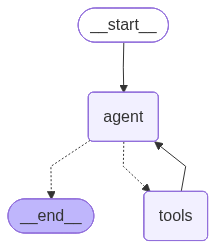

In [2]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke({"messages": ["How many orders are completed?"]})

In [12]:
ans1 = result["messages"][-1].content

clean_output = {
    "answer": ans1
}

print(clean_output)


{'answer': 'There are 11 completed orders.'}


In [13]:
result1 = app.invoke({"messages": ["Who made the highest order?"]})

In [14]:
ans2 = result1["messages"][-1].content

clean_output = {
    "answer": ans2
}

print(clean_output)


{'answer': 'Jack made the highest order.'}


In [17]:
result2 = app.invoke({"messages": ["What is the schema of the database?"]})
ans3 = result2["messages"][-1].content

clean_output = {
    "answer": ans3
}

print(clean_output)

for key, value in clean_output.items():
    print(value)


{'answer': 'The database contains two tables: `users` and `orders`.\n\nThe `users` table has the following columns:\n- `id` (INTEGER)\n- `name` (TEXT)\n- `email` (TEXT)\n- `signup_date` (DATE)\n\nThe `orders` table has the following columns:\n- `id` (INTEGER)\n- `user_id` (INTEGER)\n- `amount` (REAL)\n- `status` (TEXT)\n- `order_date` (DATE)'}
The database contains two tables: `users` and `orders`.

The `users` table has the following columns:
- `id` (INTEGER)
- `name` (TEXT)
- `email` (TEXT)
- `signup_date` (DATE)

The `orders` table has the following columns:
- `id` (INTEGER)
- `user_id` (INTEGER)
- `amount` (REAL)
- `status` (TEXT)
- `order_date` (DATE)


In [ ]:
# END